#### **NBA Performance Analysis - Using Ridge and Linear Regression**

The performance statistics in basketball are collected and analyzed to evaluate and predict a team's or individual players' performance. In this analysis, we aim to predict the points scored by NBA players in the next season, using **Linear Regression** and **Ridge Regression** algorithms.


# **Importing necessary libraries**

In [323]:
# Importing necessary libraries
import numpy as np                                                              # For numerical operations and handling arrays
import pandas as pd                                                             # For data manipulation and analysis
import seaborn as sns                                                           # For statistical data visualization (e.g., heatmaps)
import matplotlib.pyplot as plt                                                 # For general plotting and visualization

# Importing modules for machine learning
from sklearn.model_selection import train_test_split                            # To split the dataset into training and testing sets
from sklearn.preprocessing import StandardScaler, OneHotEncoder                 # For feature scaling and encoding categorical variables
from sklearn.linear_model import LinearRegression, Ridge                        # For implementing Linear and Ridge Regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score   # For model evaluation metrics

# Loading the NBA all season dataset

In [324]:
# Define the path to the CSV file containing the dataset
csv_file = 'Data/all_seasons.csv'

# Reading the CSV file into a pandas DataFrame
players_df = pd.read_csv(csv_file)


# **Statistical Overview of the Dataset**

## **Exploring the Dataset**

In [325]:
# Displaying the first five rows of the dataset to understand its structure
players_df.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


In [326]:
# Displaying the shape of the dataset to understand its dimensions (number of rows and columns)
print("Dataset Shape:")
players_df.shape

Dataset Shape:


(12844, 22)

In [327]:
players_df.describe()  # Generates summary statistics for the numerical columns in the DataFrame

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,6421.500000,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595
std,3707.887763,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3210.750000,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000
50%,6421.500000,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000
75%,9632.250000,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000
max,12843.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


In [328]:
# Checking for missing values in each column of the dataset
# This helps identify columns that may need imputation or handling before further analysis
print("Missing Values per Column:")
players_df.isnull().sum()


Missing Values per Column:


Unnamed: 0              0
player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1854
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64

In [329]:
players_df.columns

Index(['Unnamed: 0', 'player_name', 'team_abbreviation', 'age',
       'player_height', 'player_weight', 'college', 'country', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season'],
      dtype='object')

### **The Data**  
#### **Explanation of the columns:**  
* **`Unnamed`** - A placeholder column for index numbers, often used to retain the original index during data imports.  
* **`player_name`** - The full name of the basketball player.  
* **`team_abbreviation`** - Abbreviation of the player's team name (e.g., HOU for Houston Rockets).  
* **`age`** - The age of the player during the season.  
* **`player_height`** - The height of the player (CM) | **`player_weight`** - The weight of the player (KG).  
* **`college`** - The name of the college the player attended before joining the professional league.  
* **`country`** - The player's country of origin or representation.  
* **`draft_year`** - The year the player was drafted into the league.  
* **`draft_round`** - The round of the draft in which the player was selected. | **`draft_number`** Indicating the specific pick number.
* **`gp`** The total number of games played by the player.
* **`net_rating`** - The player's net rating, calculated as the difference between offensive and defensive ratings.  
* **`oreb_pct`** - Offensive rebound percentage | **`dreb_pct`** - Defensive rebound percentage |  **`reb`**  - Average rebounds per game.  
* **`usg_pct`** - Usage percentage; estimates the percentage of team plays used by the player while on the court.  
* **`ts_pct`** - True shooting percentage; measures shooting efficiency considering field goals, 3-point field goals, and free throws.  
* **`ast_pct`** - Assist percentage | **`ast`** - Average assists per game by the player.  
* **`pts`** - Average points scored per game by the player during the season.  
* **`season`** - The NBA season in which the statistics were recorded (e.g., 1996-97).  


In [330]:
players_df.dtypes  # Displays the data types of each column in the DataFrame

Unnamed: 0             int64
player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year            object
draft_round           object
draft_number          object
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

# **Data Preprocessing**

Converting string labels into numeric values 

In [331]:
# Handling non-numeric values in draft columns and converting them to numeric

# Convert 'draft_year' to numeric, coerce errors to NaN and replace NaNs with 0
players_df['draft_year'] = pd.to_numeric(players_df['draft_year'], errors='coerce').fillna(0).astype(int)

# Convert 'draft_round' to numeric, coerce errors to NaN and replace NaNs with 0
players_df['draft_round'] = pd.to_numeric(players_df['draft_round'], errors='coerce').fillna(0).astype(int)

# Convert 'draft_number' to numeric, coerce errors to NaN and replace NaNs with 0
players_df['draft_number'] = pd.to_numeric(players_df['draft_number'], errors='coerce').fillna(0).astype(int)

# Display the data types of all columns after the conversion
players_df.dtypes


Unnamed: 0             int64
player_name           object
team_abbreviation     object
age                  float64
player_height        float64
player_weight        float64
college               object
country               object
draft_year             int64
draft_round            int64
draft_number           int64
gp                     int64
pts                  float64
reb                  float64
ast                  float64
net_rating           float64
oreb_pct             float64
dreb_pct             float64
usg_pct              float64
ts_pct               float64
ast_pct              float64
season                object
dtype: object

### **Dropping Irrelevant Columns**
Here,
* `Unnamed: 0`, `team_abbreviation`, `college`, `country`, `season` irrelevant object features

Hence, we drop the above columns from the dataframe.

In [332]:
# Define the columns to drop
columns_to_drop = ['Unnamed: 0', 'team_abbreviation', 'college', 'country', 'season']

# Drop the specified columns from the DataFrame, ignoring errors if the column does not exist
players_df.drop(columns=columns_to_drop, axis=1, inplace=True, errors='ignore')

# Display the remaining column names to confirm the columns have been dropped
players_df.columns


Index(['player_name', 'age', 'player_height', 'player_weight', 'draft_year',
       'draft_round', 'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating',
       'oreb_pct', 'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct'],
      dtype='object')

## **EDA**
### **_Distribution Plots for Key Metrics_**

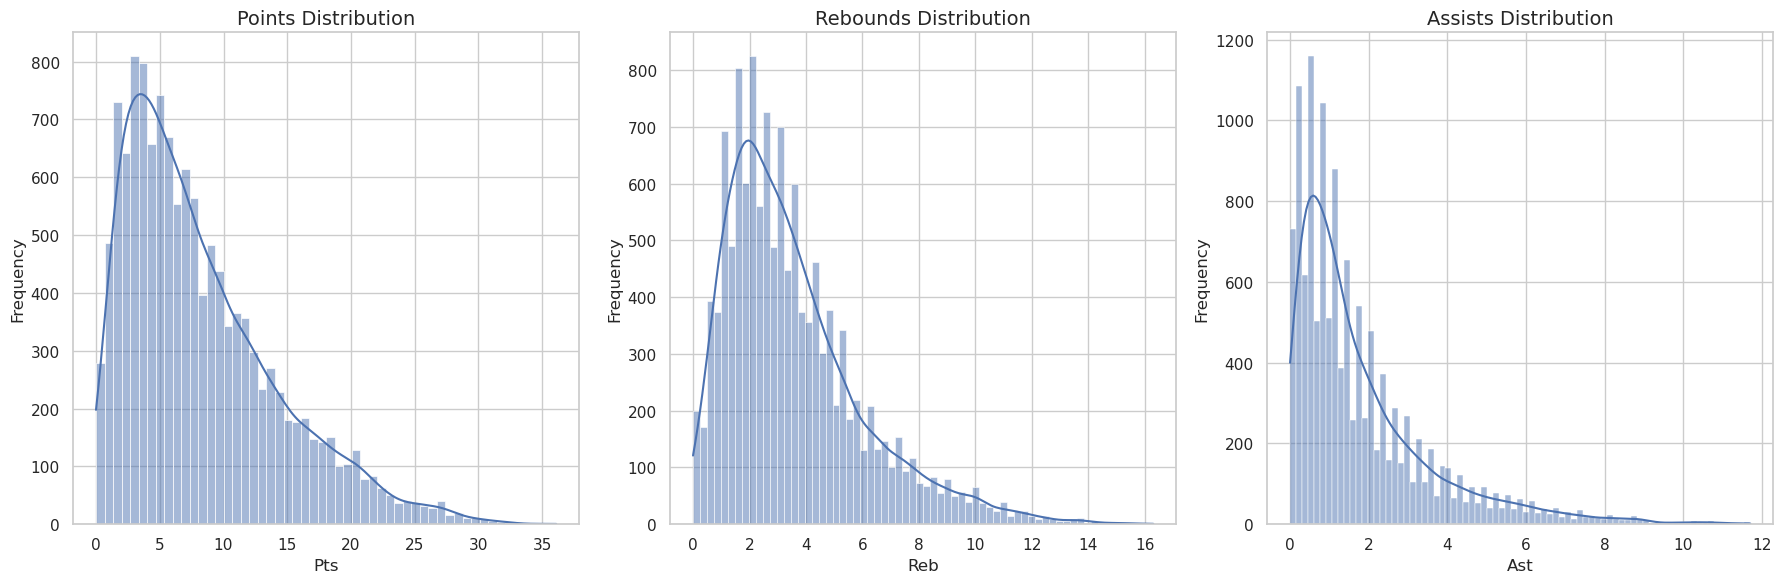

In [333]:
# Set the theme for the plots
sns.set_theme(style="whitegrid")

# Create a figure and axes for the subplots (1 row, 3 columns) to plot distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# List of key metrics to plot and their corresponding titles
key_metrics = ['pts', 'reb', 'ast']
titles = ['Points Distribution', 'Rebounds Distribution', 'Assists Distribution']

# Loop through each axis, metric, and title to generate the histograms
for ax, metric, title in zip(axes, key_metrics, titles):
    # Plot a histogram with KDE (Kernel Density Estimation) to visualize distribution
    sns.histplot(players_df[metric], kde=True, ax=ax)
    
    # Set the title and axis labels
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(metric.capitalize(), fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Display the plots
plt.show()


### **_Insights from the Distribution of Key Metrics_**

- **Points (`pts`)**:  
  The distribution is right-skewed, with most players scoring under 15 points per game. Few outliers exceed 30 points.

- **Rebounds (`reb`)**:  
  Similarly, most players average under 8 rebounds per game, with a long tail for outliers.

- **Assists (`ast`)**:  
  Most players contribute fewer than 5 assists per game.

### **_Correlation Matrix Calculation and Heatmap Visualization_**

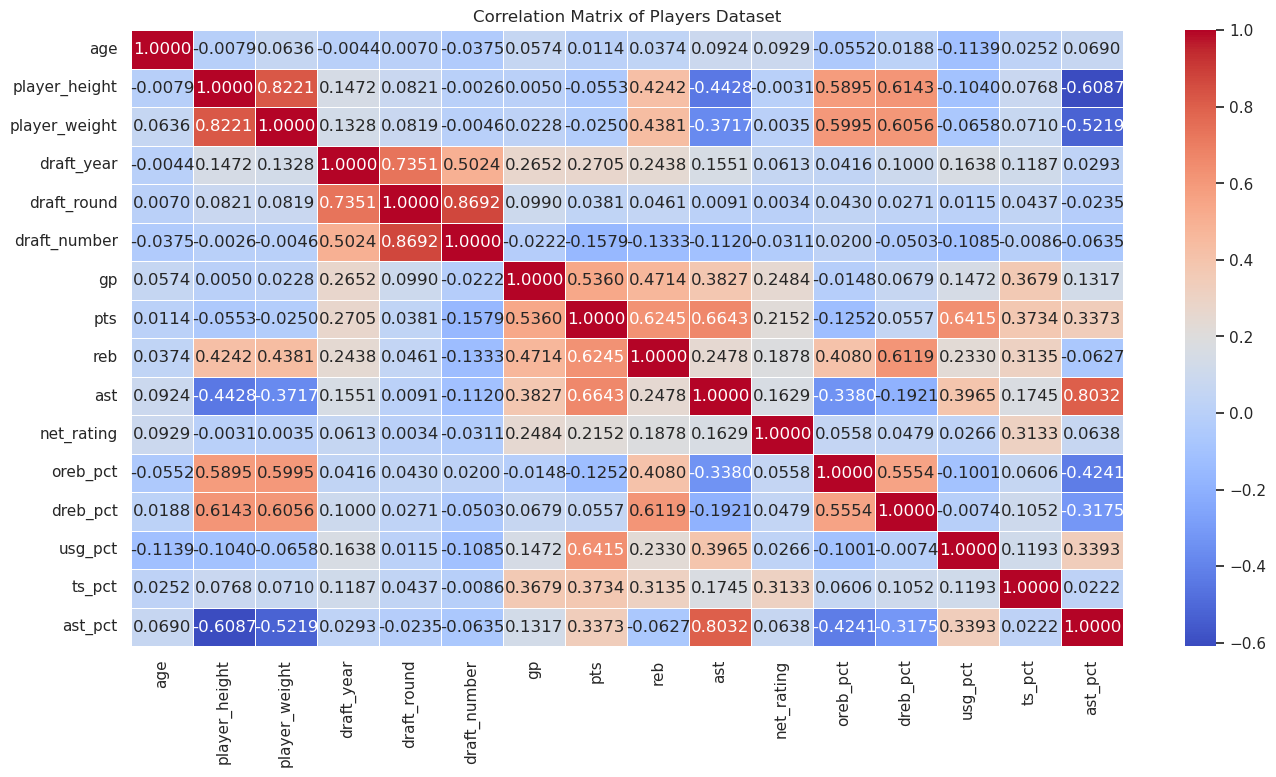

In [334]:
# Drop the 'player_name' column as it is a non-numeric feature
correlation_matrix = players_df.select_dtypes(exclude=['object']).corr()

# Plot the correlation matrix as a heatmap for better visualization
plt.figure(figsize=(16, 8))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.4f', linewidths=0.5)  # Create the heatmap with annotations
plt.title('Correlation Matrix of Players Dataset')  # Set the title of the plot
plt.show()  # Display the plo


### **_Insights from the Correlation Heatmap:_**
1. **(+)ve correlation**
   * `(pts)` is strongly (+)ve correlated with `ast`(0.6643), `usg_pct`(0.6415), `reb`(0.6245), & `gp`(0.5360).
   * `(pts)` is moderatly (+)ve correlated with `ts_pct`(0.3734), & `ast_pct`(0.3373).
   * `(pts)` is weakly (+)ve correlated with `draft_year`(0.2705), & `net_rating`(0.2152).

2. **(-)ve correlation**
   * `(pts)` is weakly (-)ve correlated with `draft_number`(-0.1579), & `oreb_pct`(-0.1252).


## **Feature Selection**

In [335]:
# Get correlations with the target variable 'pts'
pts_correlation = correlation_matrix['pts']

# Select columns based on the correlation thresholds:
selected_columns = pts_correlation[(pts_correlation > 0.2) | # Select features with a correlation greater than 0.20 with PTS
                                   (pts_correlation < -0.1)  # Select features with a correlation less than -0.10 with PTS
                                   ].index.tolist()

# Display the selected columns
selected_columns

['draft_year',
 'draft_number',
 'gp',
 'pts',
 'reb',
 'ast',
 'net_rating',
 'oreb_pct',
 'usg_pct',
 'ts_pct',
 'ast_pct']

In [336]:
# The columns that we will be making predictions with.
X = players_df[selected_columns].drop(columns=['pts'])  # Select the feature columns, excluding 'pts' (target)

# The column that we want to predict.
Y = players_df['pts']  # Set 'pts' as the target variable (points scored by players)


In [337]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   draft_year    12844 non-null  int64  
 1   draft_number  12844 non-null  int64  
 2   gp            12844 non-null  int64  
 3   reb           12844 non-null  float64
 4   ast           12844 non-null  float64
 5   net_rating    12844 non-null  float64
 6   oreb_pct      12844 non-null  float64
 7   usg_pct       12844 non-null  float64
 8   ts_pct        12844 non-null  float64
 9   ast_pct       12844 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 1003.6 KB


### Feature Importance Summary:

- **`draft_year` & `draft_number`**: Indicate potential, with higher draft picks often correlating to better performance, but are less direct predictors of current performance.
  
- **`gp` (Games Played)**: Shows a player’s experience, but more games played does not necessarily mean better performance.

- **`pts` (Points)**: A direct measure of offensive performance, highly important in predicting player success.

- **`reb` (Rebounds)**: Reflects all-around involvement, especially in defense, and contributes to performance.

- **`ast` (Assists)**: Indicates playmaking ability, vital for team success.

- **`net_rating`**: Measures overall efficiency; a high rating means a positive impact on both offense and defense.

- **`oreb_pct` (Offensive Rebound Percentage)**: Indicates a player’s hustle and ability to extend possessions, important for role players.

- **`usg_pct` (Usage Percentage)**: Reflects offensive involvement; higher values often correlate with better scorers.

- **`ts_pct` (True Shooting Percentage)**: Measures scoring efficiency, crucial for determining effective scorers.

### Key Contributors:
- **Strong**: `ast`, `usg_pct`, `reb`,& `gp`
- **Moderate**: `ts_pct`, & `ast_pct`
- **Weaker**: `draft_year`, `net_rating`, `draft_number`, & `oreb_pct`


# **Model Traning**
### **Data Scaling and Splitting**

In [338]:
# Initialize transformers for scaling
scaler = StandardScaler()  # Standardize numerical features (mean=0, std=1)

# Transform numerical columns
X = scaler.fit_transform(X)  # Apply scaling to numerical data

# Split the dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=2)  
# 75% for training, 25% for testing



### **Model Training Regression**

In [339]:
# Creating and training a Linear Regression model
linear_model = LinearRegression()  # Instantiating the LinearRegression model
linear_model.fit(X_train, Y_train)  # Fitting the model on the training data

# Making predictions on the test set
Y_pred_linear = linear_model.predict(X_test)  # Predicting points (Y) for test data

# Evaluating the model performance using different metrics
mse_linear = mean_squared_error(Y_test, Y_pred_linear)  # Calculating Mean Squared Error
r_squared_linear = r2_score(Y_test, Y_pred_linear)  # Calculating R-squared value
mae_linear = mean_absolute_error(Y_test, Y_pred_linear)  # Calculating Mean Absolute Error


### **Model Training Ridge**

In [340]:
# Creating and training a Ridge Regression model with regularization
ridge_model = Ridge()  # Instantiating the Ridge model
ridge_model.fit(X_train, Y_train)  # Fitting the model on the training data

# Making predictions on the test set
Y_pred_ridge = ridge_model.predict(X_test)  # Predicting points (Y) for the test data

# Evaluating the model performance using different metrics
mse_ridge = mean_squared_error(Y_test, Y_pred_ridge)  # Calculating Mean Squared Error
r_squared_ridge = r2_score(Y_test, Y_pred_ridge)  # Calculating R-squared value
mae_ridge = mean_absolute_error(Y_test, Y_pred_ridge)  # Calculating Mean Absolute Error

### **Model Comparison**


In [341]:

# Creating a comparison dataset using the results of both models
comparison_data = {
    'Metric': ['Mean Squared Error (MSE)', 'R-Squared (R²)', 'Mean Absolute Error (MAE)'],
    'Linear Regression': [mse_linear, r_squared_linear, mae_linear],
    'Ridge Regression': [mse_ridge, r_squared_ridge, mae_ridge]
}

# Converting the dictionary into a DataFrame for better visualization
comparison_df = pd.DataFrame(comparison_data)

# Printing the comparison dataset
comparison_df.head()

,Metric,Linear Regression,Ridge Regression
0,Mean Squared Error (MSE),4.422493,4.422820
1,R-Squared (R²),0.877691,0.877682
2,Mean Absolute Error (MAE),1.477551,1.477690


## Conclusion:

The performance of **Linear Regression** and **Ridge Regression** is nearly identical, with only slight differences in the metrics. Both models have almost the same **Mean Squared Error (MSE)**, **R-Squared (R²)**, and **Mean Absolute Error (MAE)** values. This suggests that the regularization in **Ridge Regression** does not provide a significant improvement over **Linear Regression** for this dataset.
- Therefore, both models perform similarly, with **Linear Regression** being a simpler and effective choice.